출처
heartcored98
/
Standalone-DeepLearning

데이터 생성

In [1]:
# X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# X = [ i for i in range(10) ]
X = list(range(10))
Y = [1, 1, 2, 4, 5, 7, 8, 9, 9 ,10]

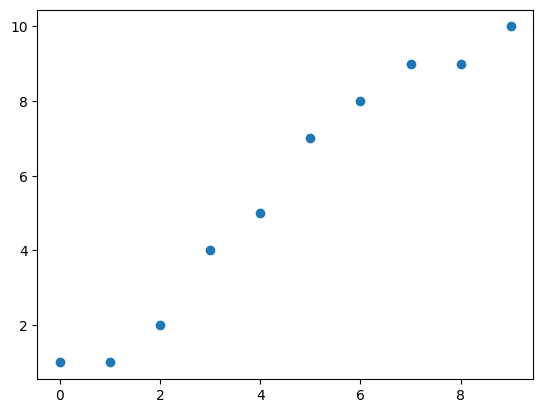

In [2]:
import matplotlib.pyplot as plt
# plt.plot(X, Y)
plt.scatter(X, Y) # matplotlib 셀 안에서 한장에 다 그리고 보여주는 방식임
plt.show()

모델 정의

In [3]:
class H():
    def __init__(self, w): # 클래스 안의 함수는 메서드인데 메서드의 맨 앞인자는 self여야한다.
        # 처음에 모델의 파라미터(학습을 통해 최적화될 값) w를 input으로 받아 model을 만들어준다. hypothesis를 생성을 하겠다!
        self.w = w

    def forward(self, x):
        # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 return
        return self.w * x

h = H(4) # f(x) = 4x 라는 모델
pred_y = h.forward(5) # x=5라는 인스턴스(샘플)이 인풋으로 들어왔을 때 f(5)=4 * 5를 통해서 20이 정상적으로 출력되는 것을 확인할 수 있다.
print('value of f(5) :', pred_y)
print('value of w :', h.w) # 모델 h의 내부 파라미터를 출력했을 때 4가 정상적으로 출력되는 것도 확인할 수 있다.

value of f(5) : 20
value of w : 4


손실함수 정의

In [4]:
def cost(h, X, Y):
    error = 0
    for i in range(len(X)):
        error += (h.forward(X[i]) - Y[i]) ** 2
    error = error / len(X)
    return error

h = H(4) # 구냥 다시 생성
print('cost value when w=4 :', cost(h, X, Y)) # f(x)=4x인 현재의 모델은 우리가 관측한 데이터셋에 대해 222.2라는 cost를 가진다.

def better_cost(pred_y, true_y):
    # 조금 더 나은 버전의 코드. cost(h, X, Y)에서는 cost function 안에서 H(x)를 계산해야해서 불편
    # 일반적으로 코드를 짤 때 cost function(loss function)들은 모델이 예측한 y값들의 리스트와 실제 y값들의 리스트만 받아서 계산하는 구조를 취함.
    error = 0
    for i in range(len(X)):
        error += (pred_y[i] - true_y[i]) ** 2
    error = error / len(X)
    return error

pred_y = [ h.forward(X[i]) for i in range(len(X)) ] # 미리 모델 h를 통해서 각 x 인스턴스에 대한 y 값을 예측해봅시다.
print('cost value with better code strcture :', better_cost(pred_y, Y)) # 위와 같이 똑같이 222.2 라는 값이 나오는 것을 확인할 수 있다.

cost value when w=4 : 222.2
cost value with better code strcture : 222.2


cost surface visualization

[-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[3582.2, 3269.825, 2971.7, 2687.825, 2418.2, 2162.825, 1921.7, 1694.825, 1482.2, 1283.825, 1099.7, 929.825, 774.2, 632.825, 505.7, 392.825, 294.2, 209.825, 139.7, 83.825, 42.2, 14.825, 1.7, 2.825, 18.2, 47.825, 91.7, 149.825, 222.2, 308.825, 409.7, 524.825, 654.2, 797.825, 955.7, 1127.825, 1314.2, 1514.825, 1729.7, 1958.825]


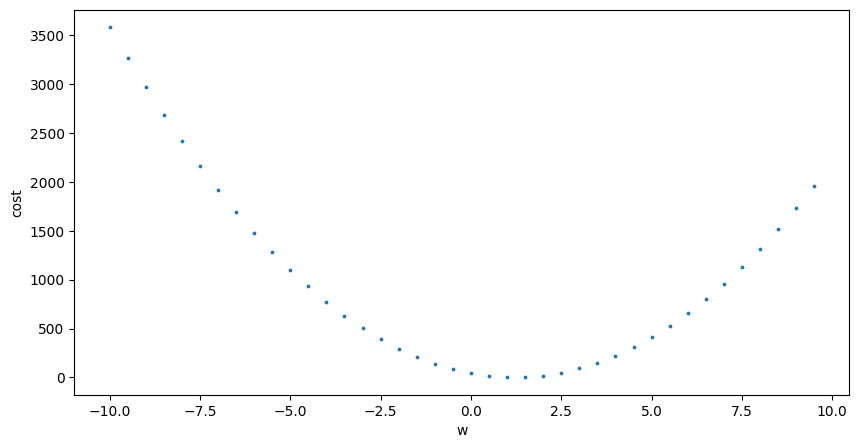

In [5]:
list_w = []
list_c = []
for i in range(-20, 20):
    w = i * 0.5
    h = H(w)
    c = cost(h, X, Y)
    list_w.append(w)
    list_c.append(c)

print(list_w)
print(list_c)

plt.figure(figsize=(10, 5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=3)

경사하강법 구현